In [61]:
import pandas as pd
import numpy as np

import thinkplot as tp
import thinkstats2 as ts

import matplotlib.pyplot as plt

In [20]:
#Here the data is loaded into a variable from a csv file
salary_data = pd.read_csv("adult-breakdown.csv")

In [21]:
#Check to see that the data loaded correctly with the headers
#salary_over_50k is the dependant variable, the others are independant
print(salary_data.head(5))

   age     education  education_num marital_status   race     sex  \
0   90       HS-grad              9        Widowed  White  Female   
1   82       HS-grad              9        Widowed  White  Female   
2   66  Some-college             10        Widowed  Black  Female   
3   54       7th-8th              4       Divorced  White  Female   
4   41  Some-college             10      Separated  White  Female   

   income_over_50k  
0            False  
1            False  
2            False  
3            False  
4            False  


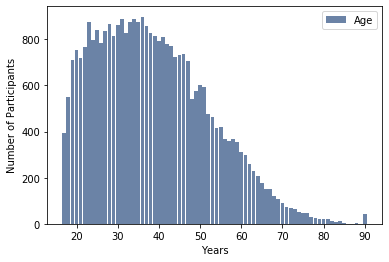

<Figure size 576x432 with 0 Axes>

In [25]:
#Histogram for the independant variable age
hist1 = ts.Hist(salary_data.age, label='Age')
tp.Hist(hist1)
tp.Show(xlabel = 'Years', ylabel='Number of Participants')

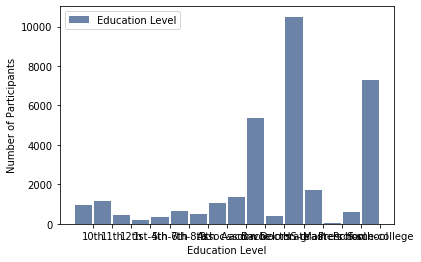

<Figure size 576x432 with 0 Axes>

In [27]:
#Histogram for the independant variable education
hist2 = ts.Hist(salary_data.education, label='Education Level')
tp.Hist(hist2)
tp.Show(xlabel = 'Education Level', ylabel='Number of Participants')

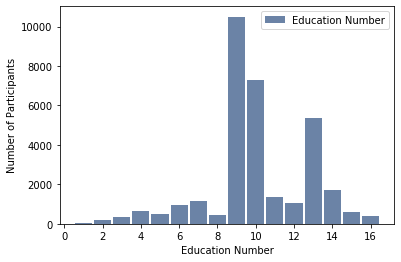

<Figure size 576x432 with 0 Axes>

In [30]:
#Histogram for the independant variable education_num
hist3 = ts.Hist(salary_data.education_num, label='Education Number')
tp.Hist(hist3)
tp.Show(xlabel = 'Education Number', ylabel='Number of Participants')

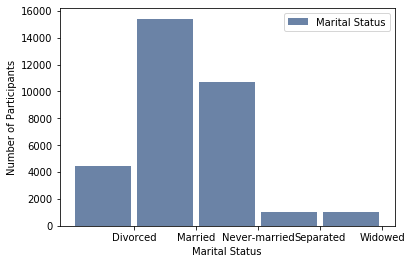

<Figure size 576x432 with 0 Axes>

In [32]:
#Histogram for the independant variable marital_status
hist4 = ts.Hist(salary_data.marital_status, label='Marital Status')
tp.Hist(hist4)
tp.Show(xlabel = 'Marital Status', ylabel='Number of Participants')

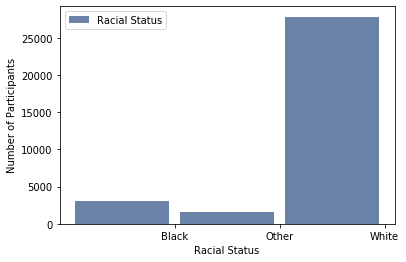

<Figure size 576x432 with 0 Axes>

In [34]:
#Histogram for the independant variable race
hist5 = ts.Hist(salary_data.race, label='Racial Status')
tp.Hist(hist5)
tp.Show(xlabel = 'Racial Status', ylabel='Number of Participants')

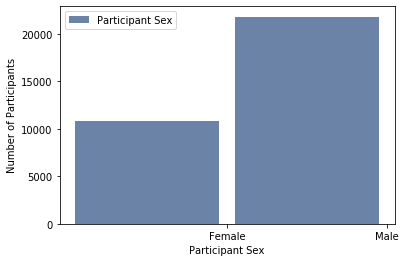

<Figure size 576x432 with 0 Axes>

In [36]:
#Histogram for the independant variable sex
hist6 = ts.Hist(salary_data.sex, label='Participant Sex')
tp.Hist(hist6)
tp.Show(xlabel = 'Participant Sex', ylabel='Number of Participants')

In [42]:
print("\n----------- Calculate Mean -----------\n")
print(salary_data.mean())
 
print("\n----------- Calculate Median -----------\n")
print(salary_data.median())
 
print("\n----------- Calculate Mode -----------\n")
print(salary_data.mode())


----------- Calculate Mean -----------

age                38.581647
education_num      10.080679
income_over_50k     0.240810
dtype: float64

----------- Calculate Median -----------

age                37.0
education_num      10.0
income_over_50k     0.0
dtype: float64

----------- Calculate Mode -----------

   age education  education_num marital_status   race   sex  income_over_50k
0   36   HS-grad              9        Married  White  Male            False


In [104]:
educ = salary_data['education_num']
educ_high = educ[educ > 8]
educ_low = educ[educ < 9]

print("Mean Education Number:")
print(educ.mean())
print("\n")

print("Median Education Number:")
print(educ.median())
print("\n")

print("Mode for Education Number:")
print(educ.mode())



Mean Education Number:
10.0806793403151


Median Education Number:
10.0


Mode for Education Number:
0    9
dtype: int64


In [97]:
pmf_educ_high = ts.Pmf(educ_high, label = 'High School +')
pmf_educ_high.Normalize()
pmf_educ_high.Total()

pmf_educ_low  = ts.Pmf(educ_low, label = 'Less than High School')
pmf_educ_low.Normalize()
pmf_educ_low.Total()
 

1.0

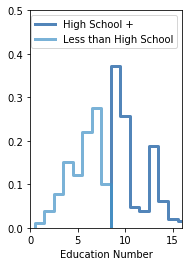

<Figure size 576x432 with 0 Axes>

In [100]:
tp.PrePlot(2)
tp.SubPlot(2)
tp.Pmfs([pmf_educ_high, pmf_educ_low])
tp.Show(xlabel = 'Education Number', axis = [0,16,0,0.5])

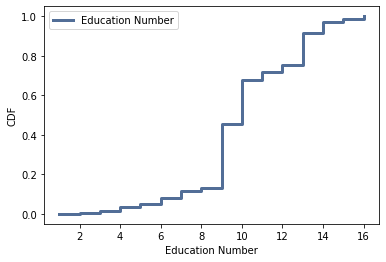

<Figure size 576x432 with 0 Axes>

In [105]:
cdf_edu = ts.Cdf(educ, label = 'Education Number')

tp.Cdf(cdf_edu)
tp.Show(xlabel = 'Education Number', ylabel = 'CDF')

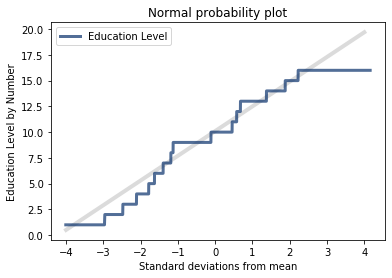

In [109]:
mean, var = ts.TrimmedMeanVar(educ, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = ts.FitLine(xs, mean, std)
tp.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = ts.NormalProbability(educ)
tp.Plot(xs, ys, label='Education Level')

tp.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Education Level by Number')

In [111]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample


In [155]:
#Education and Age

sample = SampleRows(salary_data, 5000)
u_edu_num, u_salary = sample.education_num, sample.income_over_50k

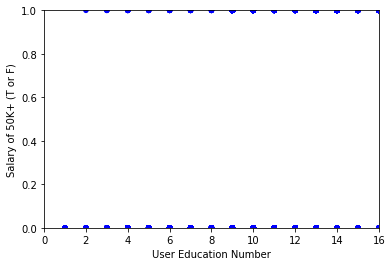

In [156]:
#Scatter Plot 1

tp.Scatter(u_edu_num, u_salary, alpha=1)
tp.Config(xlabel='User Education Number',
                 ylabel='Salary of 50K+ (T or F)',
                 axis=[0, 16, 0, 1],
                 legend=False)

In [157]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

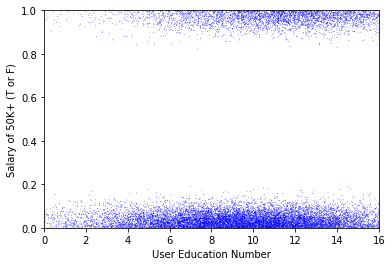

In [158]:
#Scatter Plot 2

u_age = Jitter(salary_data.education_num, 3)
u_edu_num = Jitter(salary_data.income_over_50k, .05)

tp.Scatter(u_age, u_edu_num, alpha=1, s=.5)
tp.Config(xlabel='User Education Number',
                 ylabel='Salary of 50K+ (T or F)',
                 axis=[0, 16, 0, 1],
                 legend=False)

In [160]:
class CorrelationPermute(ts.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(ts.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [168]:
#Checking for Correlation between Education and Income Over 50k
cleaned = salary_data.dropna(subset=['education_num', 'income_over_50k'])
data = cleaned.education_num.values, cleaned.income_over_50k.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [195]:
import statsmodels.formula.api as smf

formula = 'education_num ~ sex'
results = smf.ols(formula, data=salary_data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          education_num   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.911
Date:                Fri, 07 Aug 2020   Prob (F-statistic):             0.0267
Time:                        17:06:59   Log-Likelihood:                -76968.
No. Observations:               32561   AIC:                         1.539e+05
Df Residuals:                   32559   BIC:                         1.540e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.0357      0.025    404.866      0.000       9.987      10.084
sex[T.Male]     0.0671      0.030      2.216      0.027       0.008       0.127
==============================================================================
Omnibus:                      830.884   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1071.053
Skew:                          -0.315   Prob(JB):                    2.65e-233
Kurtosis:                       3.626   Cond. No.                         3.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
import statsmodels.formula.api as smf

formula = 'education_num ~ race'
results = smf.ols(formula, data=salary_data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          education_num   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     95.56
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           4.16e-42
Time:                        17:08:56   Log-Likelihood:                -76875.
No. Observations:               32561   AIC:                         1.538e+05
Df Residuals:                   32558   BIC:                         1.538e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.4862      0.046    206.688      0.000       9.396       9.576
race[T.Other]     0.8037      0.079     10.235      0.000       0.650       0.958
race[T.White]     0.6490      0.048     13.408      0.000       0.554       0.744
==============================================================================
Omnibus:                      901.180   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1173.209
Skew:                          -0.330   Prob(JB):                    1.74e-255
Kurtosis:                       3.654   Cond. No.                         8.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
import statsmodels.formula.api as smf

formula = 'education_num ~ race + sex'
results = smf.ols(formula, data=salary_data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          education_num   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     63.87
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           3.62e-41
Time:                        17:09:12   Log-Likelihood:                -76875.
No. Observations:               32561   AIC:                         1.538e+05
Df Residuals:                   32557   BIC:                         1.538e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.4755      0.048    195.882      0.000       9.381       9.570
race[T.Other]     0.8007      0.079     10.180      0.000       0.647       0.955
race[T.White]     0.6450      0.049     13.234      0.000       0.549       0.741
sex[T.Male]       0.0213      0.030      0.700      0.484      -0.038       0.081
==============================================================================
Omnibus:                      905.378   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1178.464
Skew:                          -0.332   Prob(JB):                    1.26e-256
Kurtosis:                       3.655   Cond. No.                         9.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""